In [32]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [16]:
with open('C:/Users/SIDDHARTHA/Trinity/TextAnalysis/TextAnalysis/allhashtagsjson.json') as f:
    prev_dict = json.load(f)

with open('C:/Users/SIDDHARTHA/Trinity/TextAnalysis/TextAnalysis/allhashtagsjson_new.json') as f:
    new_dict = json.load(f)

In [26]:
prev_dict_dates = prev_dict.keys()
new_dict_dates = new_dict.keys()

common = [value for value in prev_dict_dates if value in new_dict_dates]
print(common)

[]


In [27]:
len(new_dict)

245

In [28]:
len(prev_dict)

53

In [29]:
def Merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

merged_dict = Merge(prev_dict,new_dict)
len(merged_dict)

298

In [34]:
def plot_performance(title,performance_matrix,**kwargs):
    epochs=[]
    penalties=[]
    explore=[]
    exploit=[]
    for i,episode_performance in enumerate(performance_matrix):
        if 'interval' in kwargs:
            if i%kwargs['interval']==0:
                epochs.append(episode_performance[0])
                penalties.append(episode_performance[1])
        else:
            epochs.append(episode_performance[0])
            penalties.append(episode_performance[1])
    
    df=pd.DataFrame({'episodes': range(0,len(epochs)), 'epochs': epochs, 'penalties': penalties })
    plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    #plt.ylim(top=toplimit)
    if 'ylimit' in kwargs:
        plt.ylim(kwargs['ylimit'])
    if 'xlimit' in kwargs:
        plt.xlim(kwargs['xlimit'])
    if 'xlabel' in kwargs:
        plt.xlabel(kwargs['xlabel'])
    if 'ylabel' in kwargs:
        plt.ylabel(kwargs['ylabel'])
    plt.plot( 'episodes', 'epochs', data=df, marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=4)
    plt.plot( 'episodes', 'penalties', data=df, marker='o', markerfacecolor='blue', markersize=1, color='olive', linewidth=4)
    plt.title(title)
    plt.legend()
    if 'save' in kwargs:
        plt.savefig(f"graphs/{kwargs['save']}")
    plt.show()

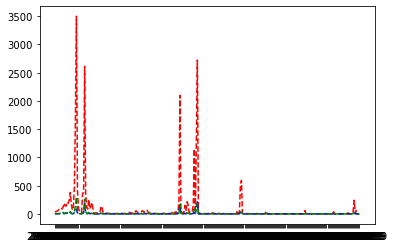

In [33]:
emotions_count_dict_datetime = merged_dict
x = list(emotions_count_dict_datetime.keys())
anger,aniticipation,disgust,fear,joy,against,_for,sadness,surprise,trust,unclassified=[],[],[],[],[],[],[],[],[],[],[]
for emo_dict in emotions_count_dict_datetime.values():
    anger.append(emo_dict.get('anger'))
    aniticipation.append(emo_dict.get('aniticipation'))
    disgust.append(emo_dict.get('disgust'))
    fear.append(emo_dict.get('fear'))
    joy.append(emo_dict.get('joy'))
    against.append(emo_dict.get('against'))
    _for.append(emo_dict.get('_for'))
    sadness.append(emo_dict.get('sadness'))
    surprise.append(emo_dict.get('surprise'))
    trust.append(emo_dict.get('trust'))
    unclassified.append(emo_dict.get('unclassified'))
x=np.array(x)
plt.plot(x, np.array(anger), 'r--', x, np.array(disgust), 'b--', x, np.array(sadness), 'g--')
plt.show()